## Powerlifting data analysis

In this analysis, we examine data from the OpenPowerlifting database, available on Kaggle [HERE](https://www.kaggle.com/datasets/open-powerlifting/powerlifting-database).

The dataset covers meets from 1964 to 2019, and includes competition information for the three main barbell lifs: squat, bench press, and deadlift.

### Questions
1. How have the popularity and number of powerlifting meets changed over time?
2. How has performance changed over time?
3. Which types of equipment are the most popular?
4. Are certain types of equipment associated with better performance?
5. What lifter characteristics are associated with better performance?

### Setup

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
%matplotlib inline

# Import data
pldata = pd.read_csv("C:/Users/maura/OneDrive/Documents/Projects/Powerlifting/archive/openpowerlifting.csv", 
                     dtype = {'Name':str, 'Sex':str, 'Event':str, 'Equipment':str,'AgeClass':str,'Division':str,'WeightClass':str,'Place':str,'Tested':str,
                                'Country':str,'Federation':str,'MeetCountry':str,'MeetState':str,'MeetName':str})

### Examine the data

In [2]:
pldata.head(10)

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,F-OR,59.8,60,80.0,...,324.16,286.42,511.15,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,F-OR,58.5,60,100.0,...,378.07,334.16,595.65,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
2,Ainslee Hooper,F,B,Raw,40.0,40-44,F-OR,55.4,56,NaN,...,38.56,34.12,313.97,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
3,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,F-OR,60.0,60,-105.0,...,345.61,305.37,547.04,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
4,Andrea Rowan,F,SBD,Wraps,45.0,45-49,F-OR,104.0,110,120.0,...,338.91,274.56,550.08,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
5,April Alvarez,F,SBD,Wraps,37.0,35-39,F-OR,74.0,75,127.5,...,354.74,312.20,596.18,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
6,Ash Morgan,F,SBD,Wraps,23.0,20-23,F-OR,59.8,60,115.0,...,385.63,340.74,612.23,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
7,Belinda Moloney,F,SBD,Wraps,35.0,35-39,F-OR,80.4,82.5,120.0,...,337.62,296.00,575.85,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
8,Briony Williams,F,SBD,Wraps,36.0,35-39,F-OR,108.0,110,180.0,...,424.49,361.57,716.65,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
9,Brooke Kowalczyk,F,SBD,Wraps,37.0,35-39,F-OR,74.8,75,180.0,...,452.31,397.92,762.42,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup


Each row contains competition information and performance statistics for a particular lifter at a powerlifting meet.

In [3]:
# Get information about each column
pldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1423354 entries, 0 to 1423353
Data columns (total 37 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Name             1423354 non-null  object 
 1   Sex              1423354 non-null  object 
 2   Event            1423354 non-null  object 
 3   Equipment        1423354 non-null  object 
 4   Age              757527 non-null   float64
 5   AgeClass         786800 non-null   object 
 6   Division         1415176 non-null  object 
 7   BodyweightKg     1406622 non-null  float64
 8   WeightClassKg    1410042 non-null  object 
 9   Squat1Kg         337580 non-null   float64
 10  Squat2Kg         333349 non-null   float64
 11  Squat3Kg         323842 non-null   float64
 12  Squat4Kg         3696 non-null     float64
 13  Best3SquatKg     1031450 non-null  float64
 14  Bench1Kg         499779 non-null   float64
 15  Bench2Kg         493486 non-null   float64
 16  Bench3Kg         4

### Clean up the data

In [4]:
# Check for duplicate rows
len(pldata)-len(pldata.drop_duplicates())

3084

The dataset has 3084 duplicate rows - we will remove these.

In [5]:
# Remove duplicate rows
pldata.drop_duplicates(inplace=True, ignore_index=True)

We will be examining the best lift for each lifter, so we'll drop the columns with 1st, 2nd, 3rd and 4th attempts of each lift.

In [6]:
pldata.drop(['Squat1Kg','Squat2Kg','Squat3Kg','Squat4Kg','Bench1Kg','Bench2Kg','Bench3Kg','Bench4Kg','Deadlift1Kg','Deadlift2Kg','Deadlift3Kg','Deadlift4Kg'],
            axis=1, inplace=True)

Now we'll add a year column using the date column.

In [7]:
pldata['Year'] = pldata['Date'].str[:4].astype('int')

The dataset ends in April of 2019. We'll remove 2019 data so that we don't have an incomplete year.

In [8]:
pldata = pldata.loc[pldata['Year']!=2019]
pldata=pldata.reset_index(drop=True)

# Check that 2019 rows were removed
pldata['Year'].max()

2018

### Data exploration

First we'll check out the oldest meet data.

In [9]:
pldata.sort_values(by = "Year")[['Date','MeetName']].drop_duplicates(subset=['Date','MeetName']).head(10)

,Date,MeetName
175476,1964-09-05,The Powerlifting Tournament Of America
86931,1965-09-04,Senior Nationals
152960,1966-10-30,Internationale Meisterschaft Kraftdreikampf
116932,1966-09-03,Senior Nationals
71392,1967-09-02,Senior Nationals
103783,1968-01-01,Senior Nationals
83492,1968-09-13,Senior Nationals
74117,1969-08-29,Senior Nationals
69882,1970-08-22,Senior Nationals
97216,1971-09-10,Senior Nationals


The dataset contains only 8 meets in the 1960s, and the earliest meet took place in 1964.

### Q1: How has the popularity and number of powerlifting meets changed over time?

We will group the data by year, and use aggregate functions to determine:
- the number of unique participants each year 
- the number of meets each year
- the maximum lifting event weight and total weight lifted each year

In [10]:
plyears = pldata.groupby(by=['Year']).agg({'Name':'nunique','Best3SquatKg':'max','Best3BenchKg':'max',
                                           'Best3DeadliftKg':'max','TotalKg':'max','MeetName':'nunique'}).reset_index(drop=False)

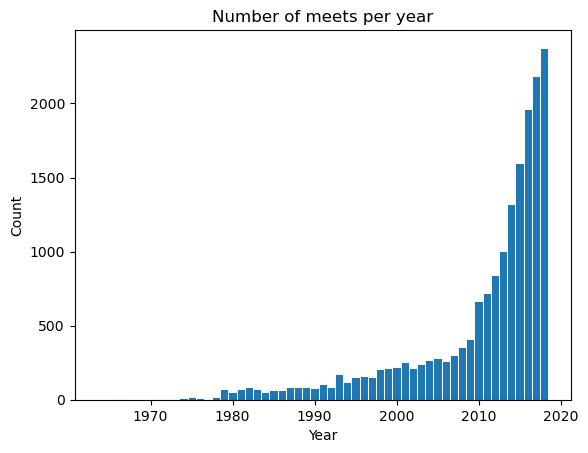

In [11]:
# Number of meets over time
fig, ax = plt.subplots()
ax.bar(plyears['Year'], plyears['MeetName'], width=1, edgecolor="white", linewidth=0.7)
plt.title("Number of meets per year")
plt.ylabel("Count")
plt.xlabel("Year")
plt.show()

The number of meets increased over time, and increases sharply after 2010. Now let's look at the number of participants over time.

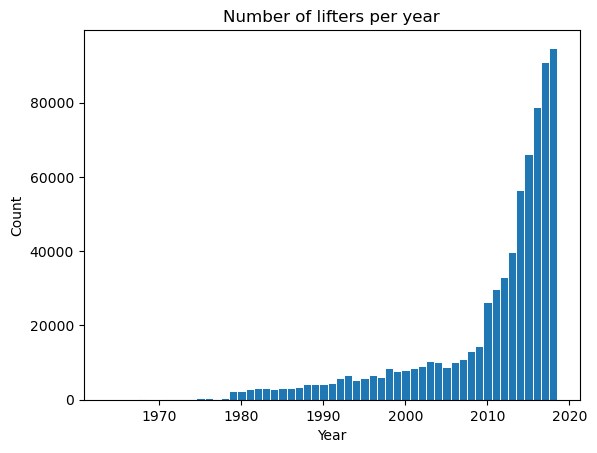

In [12]:
# Number of lifters over time
fig, ax = plt.subplots()
ax.bar(plyears['Year'], plyears['Name'], width=1, edgecolor="white", linewidth=0.7)
plt.title("Number of lifters per year")
plt.ylabel("Count")
plt.xlabel("Year")
plt.show() 

The number of meet participants increased over time, especially after 2010.

Next we'll look at lifters who competed in more than one meet.

In [13]:
# Aggregate data by competitor name, count the number of occurrences in the data, and compute the earliest and latest years of competition
pldata_name = pldata.groupby(by='Name').agg(count = ('Name','count'),Year_min=('Year','min'),Year_max=('Year','max')).reset_index(drop=False)
# subset to lifters who have competed more than once
pldata_name = pldata_name.loc[pldata_name['count']>1]

Now let's determine which lifters have competed in the most meets.

In [14]:
pldata_name.sort_values(by='count',ascending=False).head(10)

,Name,count,Year_min,Year_max
7544,Alan Aerts,214,2006,2015
343032,Sverre Paulsen,191,1982,2018
189807,Jose Hernandez,190,1982,2018
120290,Erik Rasmussen,186,1989,2018
49066,Bonnie Aerts,163,2006,2014
386040,Zbyněk Krejča,154,1994,2018
47208,Bjørn Grønvold,154,2002,2018
159128,Jackie Blasbery,148,1984,2018
252486,Max Bristow,146,1993,2018
141565,Hana Takáčová,145,1994,2018


Assuming there aren't multiple competitors with the same name, Alan Aerts competed the most - 214 meets from 2006 through 2015.

### Q2: How has performance changed over time?
With more meets and participants over time, let's explore how yearly maximum lift weights changed over time.

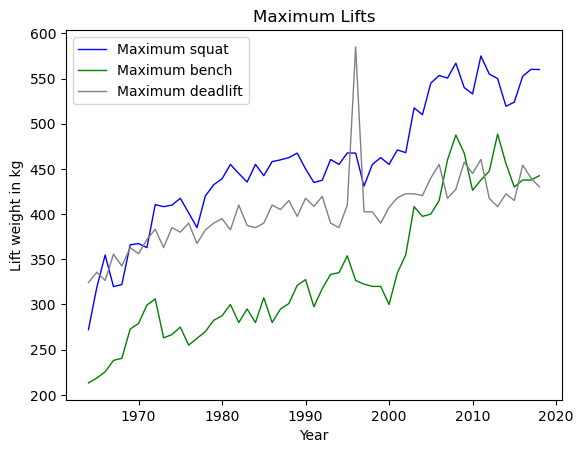

In [15]:
# Plot best lifts over time
fig, ax = plt.subplots()
ax.plot(plyears['Year'], plyears['Best3SquatKg'], color = 'blue', linewidth=1, label='Maximum squat')
ax.plot(plyears['Year'], plyears['Best3BenchKg'], color = 'green', linewidth=1, label='Maximum bench')
ax.plot(plyears['Year'], plyears['Best3DeadliftKg'], color ='gray', linewidth=1, label='Maximum deadlift')
plt.title("Maximum Lifts")
plt.ylabel("Lift weight in kg")
plt.xlabel("Year")
plt.legend()
plt.show()

Maximum lift weights increased over time. Are powerlifters physically stronger than they used to be?
Probably not. The trend is likely due to a combination of improvements in equipment, training, and nutritional optimization, and the increasing pool of competitors over time.

Out of curiosity, let's examine the outlier maximum deadlift that occurred in the 1990s. 

In [16]:
pldata.loc[pldata['Best3DeadliftKg'].idxmax()]

Name                                                 Ralph Atchinson
Sex                                                                M
Event                                                            SBD
Equipment                                                 Single-ply
Age                                                              NaN
AgeClass                                                         NaN
Division                                                   Masters 1
BodyweightKg                                                   100.0
WeightClassKg                                                    100
Best3SquatKg                                                   205.0
Best3BenchKg                                                   235.0
Best3DeadliftKg                                                585.0
TotalKg                                                          NaN
Place                                                             DQ
Wilks                             

The record says that the competitor lifted 585 kg for the deadlift in June of 1996, a very impressive deadlift! However, further investigation on [OpenPowerlifting](https://www.openpowerlifting.org/u/ralphatchinson) shows that this record is actually a typo. The competitor lifted 205 kg for the squat, 145 kg for bench press, and 235 for the deadlift. The total weight for all three lifts was 585, the source of the typo.
Let's fix the typo before we keep going.

In [17]:
pldata.loc[74603,['Best3BenchKg']] = 145
pldata.loc[74603,['Best3DeadliftKg']] = 235
pldata.loc[74603,['TotalKg']] = 585

### Q3: Which types of equipment are the most popular?

In [18]:
pldata['Equipment'].unique()
pldata['Equipment'].value_counts()

Single-ply    730084
Raw           440806
Wraps          99456
Multi-ply      64365
Straps            18
Name: Equipment, dtype: int64

There are 5 different equipment use categories: single-ply, raw, wraps, multi-ply, and straps.

Let's plot the breakdown of competitor performances by equipment category.

(-1.1104359514817654,
 1.1004969500733428,
 -1.103410342405433,
 1.1097908324070958)

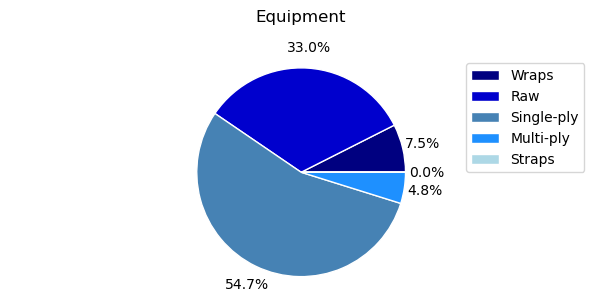

In [19]:
plt.rcParams['figure.figsize'] = (7.5,3)
mycolors = ['navy','mediumblue','steelblue','dodgerblue','lightblue']
fig, ax = plt.subplots()
ax.pie(pldata['Equipment'].value_counts(sort=False), colors = mycolors, autopct='%1.1f%%', pctdistance = 1.2,
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=False)
plt.title("Equipment", pad=25)
plt.legend(pldata['Equipment'].unique())
plt.axis('equal')

The most common equipment category is single-ply (a type of clothing that assists the lifter in performing the lift).

Straps make up a small percentage of equipment use. This is because most powerlifting federations do not allow strap use in competitions.
Lifters are often limited by their grip strength in the deadlift; straps remove grip strength as a limitation.

Let's look at strap use more closely.

In [20]:
pldata.loc[pldata['Equipment']=='Straps']

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Best3SquatKg,...,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName,Year
61976,Chris Duffin,M,D,Straps,39.0,35-39,Open,118.52,125,NaN,...,250.05,988.13,NaN,USA,WPA,2016-10-06,USA,OR,World Championships,2016
746514,Vladimir Babin,M,D,Straps,26.0,24-34,NaN,88.30,NaN,NaN,...,217.55,850.12,NaN,Russia,WRPF,2018-12-22,Belarus,NaN,Adrenaline Grand Prix,2018
746515,Oleksii Melnyk,M,D,Straps,NaN,NaN,NaN,87.00,NaN,NaN,...,219.36,856.40,NaN,Ukraine,WRPF,2018-12-22,Belarus,NaN,Adrenaline Grand Prix,2018
746516,Andrey Kulik,M,D,Straps,25.5,24-34,NaN,89.40,NaN,NaN,...,211.46,824.96,NaN,NaN,WRPF,2018-12-22,Belarus,NaN,Adrenaline Grand Prix,2018
746517,Andrey Ulashchik,M,D,Straps,35.0,35-39,NaN,95.30,NaN,NaN,...,209.22,818.97,NaN,Belarus,WRPF,2018-12-22,Belarus,NaN,Adrenaline Grand Prix,2018
746518,Dmitry Nasonov,M,D,Straps,26.0,24-34,NaN,80.00,NaN,NaN,...,230.82,893.44,NaN,Russia,WRPF,2018-12-22,Belarus,NaN,Adrenaline Grand Prix,2018
746519,Alexander Buyan,M,D,Straps,NaN,NaN,NaN,94.60,NaN,NaN,...,205.46,802.39,NaN,NaN,WRPF,2018-12-22,Belarus,NaN,Adrenaline Grand Prix,2018
746520,Vitaly Bobrov,M,D,Straps,NaN,NaN,NaN,101.80,NaN,NaN,...,185.77,717.69,NaN,NaN,WRPF,2018-12-22,Belarus,NaN,Adrenaline Grand Prix,2018
746521,Sergey Ivaneychik,M,D,Straps,NaN,NaN,NaN,107.30,NaN,NaN,...,184.84,712.22,NaN,NaN,WRPF,2018-12-22,Belarus,NaN,Adrenaline Grand Prix,2018
746522,Ilya Fedorov,M,D,Straps,NaN,NaN,NaN,89.50,NaN,NaN,...,219.05,857.77,NaN,Russia,WRPF,2018-12-22,Belarus,NaN,Adrenaline Grand Prix,2018


All 18 instances of strap use were isolated to more recent years (2016 - 2018) and only a few meets. Additionally, these competitors only competed in the deadlift event.

### Q4: Are certain types of equipment associated with better performance?

First we'll look at equipment use and deadlift weight.

We'll omit entries where the equipment is listed as "Wraps," as these are not used for the deadlift. These competitors may have performed the deadlift without equipment ("Raw"), but this is unclear based on the data available.

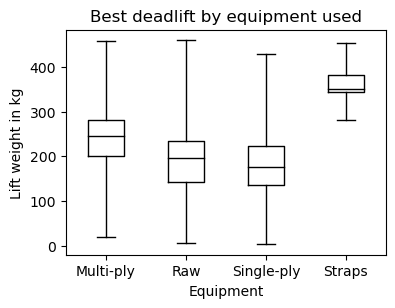

In [21]:
plt.rcParams['figure.figsize'] = (4,3)
bp = pldata.loc[(pldata['Best3DeadliftKg']>0) & (pldata['Equipment']!="Wraps")].boxplot(column=['Best3DeadliftKg'], by='Equipment', grid=False, whis=(0,100), color='k')
ax.set(xlim=(0, 12), xticks=np.arange(1, 12),
        ylim=(0, 12), yticks=np.arange(1, 21))
bp.get_figure().suptitle('')
plt.ylabel("Lift weight in kg")
plt.title("Best deadlift by equipment used")
plt.show()

Although the sample size for strap use is too small to make definitive conculsions, the distributions of deadlift weights suggest that strap use is associated with a heavier deadlift.
For competitions that do not permit straps, it appears that multi-ply eqiupment is associated with stronger performance.

Since 4/5 of the types of equipment listed are pertinent to the squat, we will also examine best weights lifted in the squat.

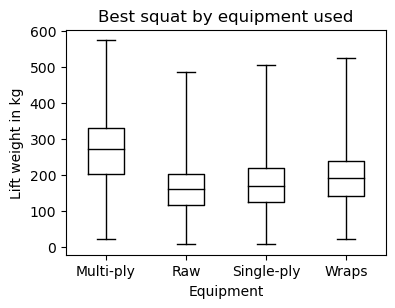

In [22]:
plt.rcParams['figure.figsize'] = (4,3)
bp = pldata.loc[pldata['Best3SquatKg']>0].boxplot(column=['Best3SquatKg'], by='Equipment', grid=False, whis=(0,100), color='k')
ax.set(xlim=(0, 12), xticks=np.arange(1, 12),
        ylim=(0, 12), yticks=np.arange(1, 21))
bp.get_figure().suptitle('')
plt.ylabel("Lift weight in kg")
plt.title("Best squat by equipment used")
plt.show()

As with the deadlift, it appears that multi-ply equipment is associated with stronger squat performance.

### Q5: What lifter characteristics are associated with better performance?
Powerlifting federations typically group lifters by age and weight classes for scoring purposes.

First let's look at the age classes used for meets.

In [23]:
pldata['AgeClass'].unique()

array(['24-34', '40-44', '20-23', '45-49', '35-39', '18-19', '50-54',
       '16-17', '80-999', '70-74', nan, '65-69', '13-15', '60-64',
       '55-59', '75-79', '5-12'], dtype=object)

There are 16 age classes (not including the null group), with ages ranging from 5 to 80+. 

First we'll look at top lifts for each age class.

In [24]:
# Aggregate to find maximum lift for each age class
best_s = pldata.loc[pldata.groupby(['AgeClass'])['Best3SquatKg'].idxmax().dropna()]
best_b = pldata.loc[pldata.groupby(['AgeClass'])['Best3BenchKg'].idxmax().dropna()]
best_d = pldata.loc[pldata.groupby(['AgeClass'])['Best3DeadliftKg'].idxmax().dropna()]

We'll plot these age class maximum lift weights by age (rather than age class).

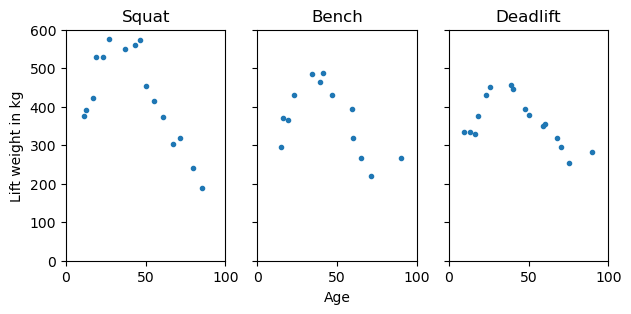

In [25]:
plt.rcParams['figure.figsize'] = (7,3)
fig,(ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3,sharey=True)
ax1.plot(best_s['Age'].loc[best_s['Best3SquatKg']>0], 
         best_s['Best3SquatKg'].loc[best_s['Best3SquatKg']>0],'.')
ax2.plot(best_b['Age'].loc[best_b['Best3BenchKg']>0], 
         best_b['Best3BenchKg'].loc[best_b['Best3BenchKg']>0],'.')
ax3.plot(best_d['Age'].loc[best_d['Best3DeadliftKg']>0], 
         best_d['Best3DeadliftKg'].loc[best_d['Best3DeadliftKg']>0],'.')
plt.title("Squat: lift Weight vs age")
ax1.set_title("Squat")
ax2.set_title("Bench")
ax3.set_title("Deadlift")
ax1.set_ylabel("Lift weight in kg")
ax2.set_xlabel("Age")
ax1.set_ylim(0,600)
for ax in [ax1,ax2,ax3]:
    ax.set_xlim(0,100)
plt.show()

Age appears to be an important factor in lift performance. The top competitors for the 3 lifts were between 25-50 years old.

Powerlifting meets also group competitors by weight class.

Let's look at total weight lifted (sum of best lifts for squat, bench, and deadlift).

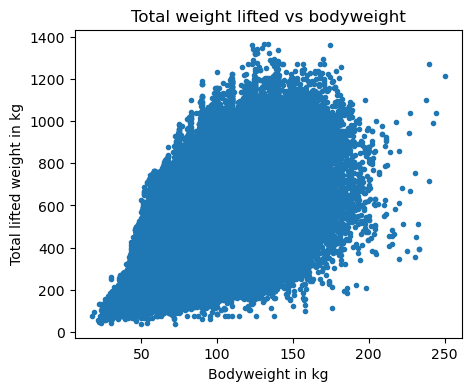

In [26]:
plt.rcParams['figure.figsize'] = (5,4)
fig, ax = plt.subplots()
ax.plot(pldata['BodyweightKg'].loc[(pldata['Event']=="SBD")], 
         pldata['TotalKg'].loc[(pldata['Event']=="SBD")],'.', label='Maximum best squat')
plt.title("Squat: lift Weight vs age")
ax.set_title("Total weight lifted vs bodyweight")
plt.ylabel("Total lifted weight in kg")
plt.xlabel("Bodyweight in kg")
plt.show()

There is a positive relationship between bodyweight and weight lifted.

Now let's explore the relationship between performance in the different lifts.
We might expect that a stronger bench press is associated with a stronger squat and deadlift, etc. Let's test that theory.

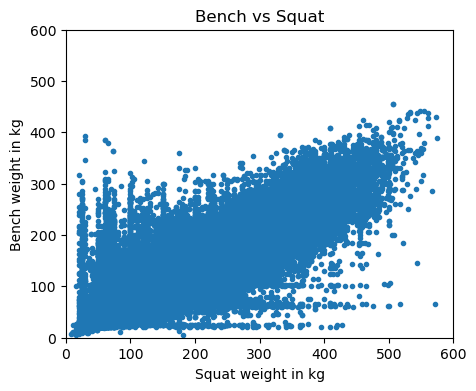

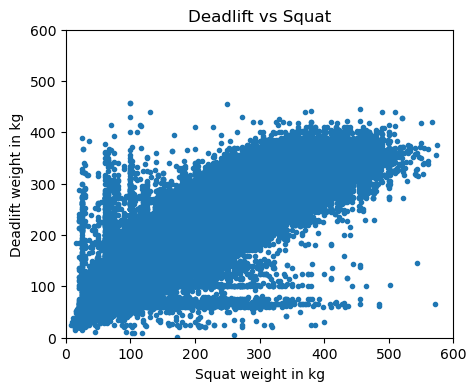

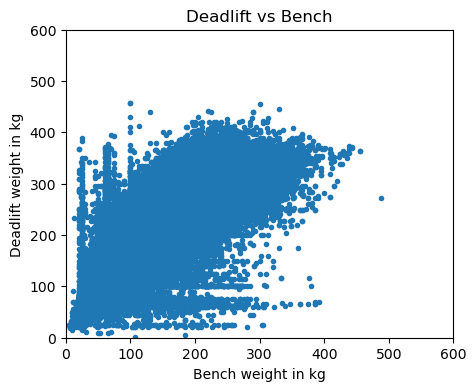

In [27]:
for lifts in combinations(['Squat','Bench','Deadlift'],2):
    plt.rcParams['figure.figsize'] = (5,4)
    fig, ax = plt.subplots()
    ax.plot(pldata['Best3'+lifts[0]+'Kg'], pldata['Best3'+lifts[1]+'Kg'],'.')
    plt.title(lifts[1]+" vs "+lifts[0])
    plt.xlabel(lifts[0]+" weight in kg")
    plt.ylabel(lifts[1]+" weight in kg")
    plt.ylim(0,600)
    plt.xlim(0,600)
    plt.show()

As expected, better performance in one lift event is associated with better performance in others.

An interesting phenomenon visible in all three plots is the horizontal and vertical fanning where data points deviate from the dominant positive relationship. One possible explanation for this pattern is performances where the competitor did not devote maximum effort to all lifts. These points may represent competitors who specialize in a certain lift, and prioritize lifting maximum weight in that lift over the others. The points may also include lifters who lifted less than their maximum potential in certain events due to an injury.

### Summary
1. How has the popularity and number of powerlifting meets changed over time?
    
    The number of meets and participants increased over time, and increased sharply after 2010.
    

2. How has performance changed over time?
    
    Maximum lift weights in all three lifts increased over time.
    

3. Which types of equipment are the most popular?

    The most popular type of competition equipment is single-ply clothing, followed by competing raw.
    

4. Are certain types of equipment associated with better performance?

    For deadlifts, strap usage is associated with the highest lift weights. Multi-ply clothing is associated with better performance in both the deadlift and the squat. 
    

5. What lifter characteristics are associated with better performance?

    The top competitors for the 3 lifts were between 25-50 years old. In general, lifters with a heavier bodyweight are able to lift more weight in the 3 lifts. 

### Other Considerations
- As we found in the data exploration, many of the dataset columns contain null values
- Some powerlifting federations classify equipment differently. For example, some don't make any distinction between knee sleeves and knee wraps. Using knee sleeves would still qualify as competing Raw; using wraps would not.
- As mentioned above, the equipment column does not specify event-based equipment use. For example, we know that wraps are not used for the deadlift. For entries where the equipment is listed as "Wraps", it is unclear if these competitors performed the deadlift without equipment ("Raw").
- As evidenced by the best deadlift outlier above, the database appears to have some typos. Luckily the error we found appears to have been rectified in OpenPowerlifting's up-to-date database.

### References
1. https://www.kaggle.com/datasets/open-powerlifting/powerlifting-database
2. https://www.openpowerlifting.org/